# INDIAN STARTUP DATASET #

In [3]:
!pip install squarify

In [4]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import squarify
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot,init_notebook_mode,plot

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/startup_funding_india.csv',encoding = 'unicode_escape')
del df1['Remarks'],df1['ï»¿Sr No']
df1.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


###Cleaning the dataset

In [ ]:
#conveting each column to type string as they are in object type
for col in df1.columns:
  df1[col] = df1[col].astype('str') 

In [ ]:
#Function to clean the string
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in df1.columns:
    df1[col] = df1[col].apply(lambda x: clean_string(x))
    

In [ ]:
# lets convert the amount column into numerical, so that we can analyze the values inside it
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
df1["Amount in USD"] = df1["Amount in USD"].apply(lambda x: float(clean_amount(x)))


In [ ]:
#we find that Bangalore and Bengalure both are used in the dataset
df1['City  Location'] = df1['City  Location'].str.replace('Bengaluru','Bangalore')
df1 = df1.rename(columns={'Date dd/mm/yyyy':'Date'})

In [ ]:
#file in next version #
df1['Date'][df1['Date']=='01/07/015'] = '01/07/2015'
df1['Date'][df1['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df1['Date'][df1['Date']=='12/05.2015'] = '12/05/2015'
df1['Date'][df1['Date']=='13/04.2015'] = '13/04/2015'
df1['Date'][df1['Date']=='15/01.2015'] = '15/01/2015'
df1['Date'][df1['Date']=='22/01//2015'] = '22/01/2015'
df1['Date'][df1['Date']=='05/072018'] = '05/07/2018'

df1["year"] = pd.to_datetime(df1['Date'],format='%d/%m/%Y').dt.year
df1["yearmonth"] = (pd.to_datetime(df1['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df1['Date'],format='%d/%m/%Y').dt.month)

In [ ]:
#cleaning
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace(" ","")
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace("/","")
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace("/n","")
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace("\n","")
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace("AngelFunding","Angel")
df1['InvestmentnType'] = df1['InvestmentnType'].str.replace("DebtFunding","Debt")

##Exploratory analysis

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3044 non-null   object 
 1   Startup Name       3044 non-null   object 
 2   Industry Vertical  3044 non-null   object 
 3   SubVertical        3044 non-null   object 
 4   City  Location     3044 non-null   object 
 5   Investors Name     3044 non-null   object 
 6   InvestmentnType    3044 non-null   object 
 7   Amount in USD      3044 non-null   float64
 8   year               3044 non-null   int64  
 9   yearmonth          3044 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 237.9+ KB


In [ ]:
for col in df1.columns.values:
  list_vals = pd.unique(df1[col])
  print(col + ', has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

Date, has 1031 unique values


Startup Name, has 2457 unique values


Industry Vertical, has 822 unique values


SubVertical, has 1943 unique values


City  Location, has 107 unique values


Investors Name, has 2409 unique values


InvestmentnType, has 51 unique values


Amount in USD, has 458 unique values


year, has 6 unique values
  These are: 2020, 2019, 2018, 2017, 2016, 2015


yearmonth, has 60 unique values




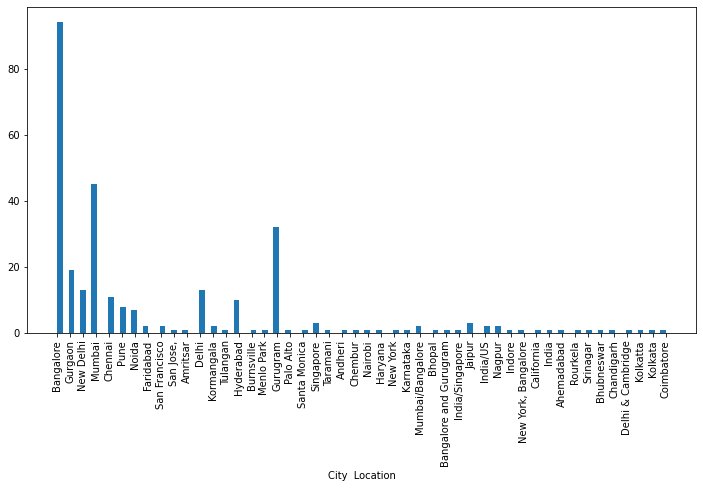

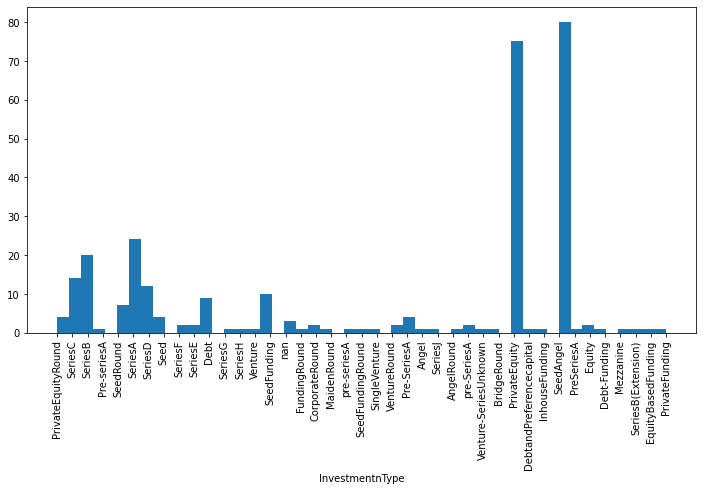

In [ ]:
for col in ['City  Location','InvestmentnType']:
  if(len(pd.unique(df1[col]))>10):
    plt.figure(figsize=(12,6))
    plt.hist(df1[col][:300], bins=len(pd.unique(df1[col])))
    plt.xticks(rotation=90)
  else :
    plt.figure(figsize=(10,5))
    plt.hist(df1[col][:100])
    plt.xticks(rotation=45)
    
  plt.xlabel(col)
  plt.show()

##Descriptive Analysis##

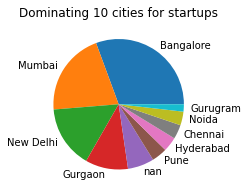

In [ ]:
count = df1['City  Location'].value_counts()
plt.pie(count.values[:10],labels=count.index[:10])
plt.title('Dominating 10 cities for startups')
plt.show()

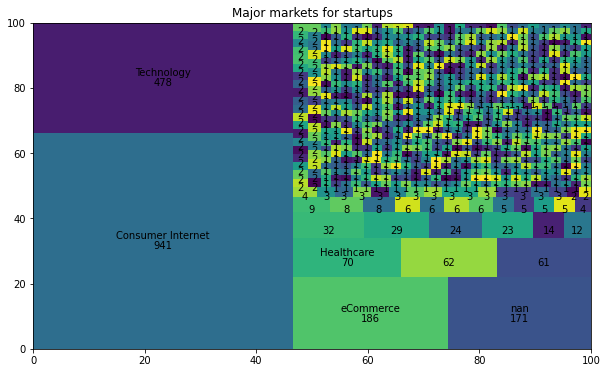

In [ ]:
plt.figure(figsize=(10,6))
count = df1['Industry Vertical'].value_counts()
squarify.plot(sizes=count.values,label=count.index[:5], value=count.values)
plt.title('Major markets for startups')
plt.show()

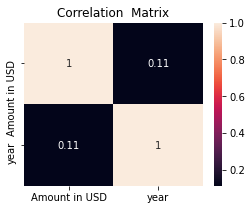

In [ ]:
#Heatmap
df2 = df1.drop(columns='yearmonth')
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation  Matrix')
plt.show()

In [ ]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
df1['numberofinvestors']=df1['Investors Name'].replace(np.NaN,'empty').apply(calculate_n_investors)

## Predictive Analysis

Funding rounds vs company analysis

In [ ]:
totalFunding = df1['Startup Name'].value_counts()

fig = px.scatter(totalFunding,x=totalFunding.index,y=totalFunding[0:],title='Total Number of Funding to Each Company',
                labels={
                    'index':"Company's Name",
                    'y':'Total No. of Times Funding Received'
                })

fig.show()

How is funding varying across industries

Consumer Internet    941
Technology           478
eCommerce            186
nan                  171
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Name: Industry Vertical, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



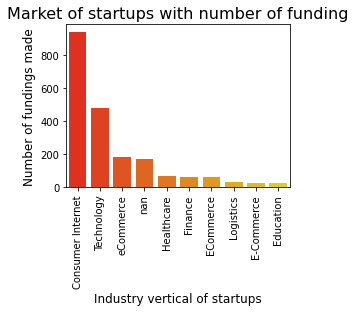

In [ ]:
industry = df1['Industry Vertical'].value_counts().head(10)
print(industry)

plt.rcParams['figure.figsize'] = (4, 3)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Market of startups with number of funding", fontsize=16)
plt.show()

Distribution among Indian cities

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



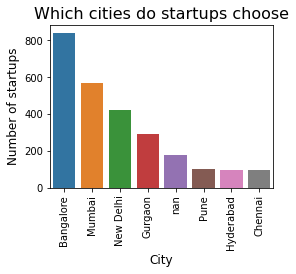

In [ ]:
city = df1['City  Location'].value_counts().head(8)
plt.figure(figsize=(4,3))
sns.barplot(city.index,city.values)
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of startups', fontsize=12)
plt.title("Which cities do startups choose", fontsize=16)
plt.show()

How location affects funding

In [ ]:
temp_df = df1.groupby(["City  Location","year"])["Amount in USD"].agg(["size", "mean"]).reset_index()
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
temp_df = temp_df[temp_df["City  Location"].isin(cities_to_use)]
temp_df.columns = ["City  Location", "Year", "Amount in USD", "Mean"]

fig = px.scatter(temp_df, x="Year", y="City  Location", color="City  Location", size="Amount in USD")
fig.show()

In [ ]:
temp_df = df1.groupby(["Industry Vertical","year"])["Amount in USD"].agg(["size", "mean"]).reset_index()
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["Industry Vertical"].isin(values_to_use)]
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["Industry Vertical", "Year", "Count", "Mean"]
fig = px.scatter(temp_df, x="Year", y="Industry Vertical", color='Industry Vertical', size="Mean",title = "Mean funding value by market over time")
fig.show()

In [ ]:
industryType = df1.groupby(['Industry Vertical'])['Amount in USD'].mean()

AboveM = industryType[industryType>100000000]
fig = px.scatter(x = AboveM.index,y=AboveM,color=AboveM,size=AboveM,title='Funding (100M+) Vs Industry Type',
                labels={
                    'x':'Industry Type',
                    'y':'Total Funding'
                })
fig.show()

In [ ]:
LessM = industryType[(industryType<100000000) & (industryType>50000000)]
fig = px.scatter(x=LessM.index,y=LessM,size=LessM,color=LessM,title='Funding (50M-100M) Vs Industry Type',
                labels={
                    'x':'Industry Type',
                    'y':'Total Funding'
                })
fig.show()

In [ ]:
df1['Investors Name'][df1['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'
df1['Investors Name'][df1['Investors Name'] == 'nan'] = 'Undisclosed Investors'
plt.figure(figsize=(4,3))
investors = df1['Investors Name'].value_counts().head(10)
sns.barplot(investors.index, investors.values)

plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()


Distribution of PE and Seed Funding

In [ ]:
s = ['PrivateEquity','SeedFunding']
a = df1[(df1['InvestmentnType'] =='PrivateEquity')|( df1['InvestmentnType']== 'SeedFunding')]


In [ ]:
print("Length of the record is",len(df1))
print("Number of startups that got Private equity(PE) fund and seed funds are")
print(a['InvestmentnType'].value_counts())
print("So it is important to analyse how they are distributed")

Length of the record is 3044
Number of startups that got Private equity(PE) fund and seed funds are
PrivateEquity    1357
SeedFunding      1355
Name: InvestmentnType, dtype: int64
So it is important to analyse how they are distributed


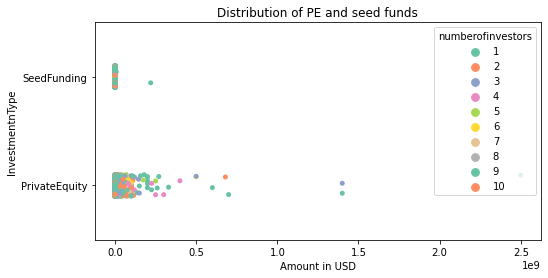

In [ ]:
plt.figure(figsize=(8,4))
sns.stripplot(y="InvestmentnType",x="Amount in USD",data=a,palette="Set2",hue="numberofinvestors")
plt.title("Distribution of PE and seed funds")
plt.show()


In [ ]:
fig_funding_amt = px.scatter(df[:5000],x="name", y="funding_rounds", size='funding_total_usd', color='status')

fig_funding_amt.update_layout(title='Plot Showing the Funding and Total funding acquired by Startups',
                              xaxis_title="Startups",yaxis_title="Funding Rounds",
                            xaxis_showticklabels=False,paper_bgcolor="mintcream",
                             title_font_size=20, title_x=0.5,legend=dict(orientation='h',yanchor='top',y=1.08,xanchor='right',x=1))

#fig_funding_amt.update_traces(hovertemplate = '<br><b>Company</b>: %{x}'+'<br><i>Funding Rounds</i>: %{y}'+'<br><i>Funding(in USD)</i>: %{marker.size}')
fig_funding_amt.show()

Funding of unicorn companies

[]

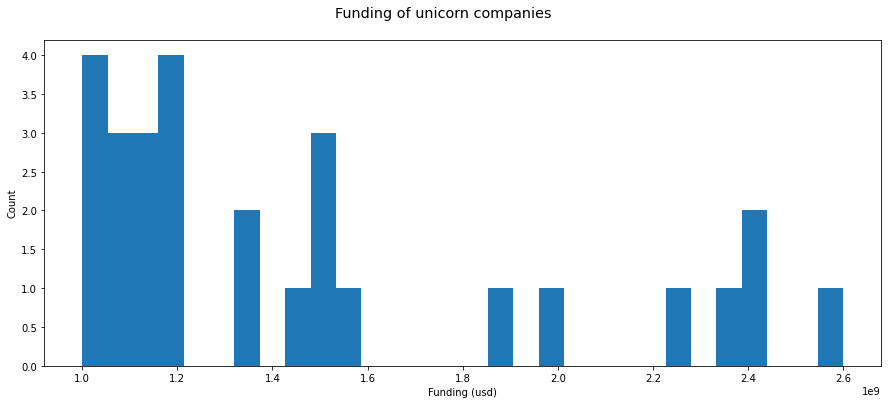

In [ ]:
plt.rcParams['figure.figsize'] = 15,6

plt.hist(df['funding_total_usd'][(df['funding_total_usd'] >= 1000000000)&(df['funding_total_usd'] <= 3000000000)].dropna(), bins=30)
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Funding of unicorn companies ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.plot()

# Startup data analysis across world#

In [5]:
df = pd.read_csv('/content/drive/MyDrive/investments_VC.csv',encoding = 'unicode_escape')
del df['homepage_url'], df['permalink']
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning the Dataset ##

Removing null values

In [6]:
df = df[~df.name.isna()]

In [7]:
df.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

Some column names are not named correctly, they have unnecessary spaces. Those had to be corrected

In [8]:
df.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

Funding total usd column contains has "," "-" and spaces. Those had to be replaced

In [9]:
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ', '')

df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
df.dropna()
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.dtypes

name                     object
category_list            object
market                   object
funding_total_usd       float64
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C 

In [11]:
len(df)

49437

## Some preliminary analysis##



In [12]:
df['funding_rounds'].value_counts()

1.0     32038
2.0      9219
3.0      4026
4.0      1997
5.0      1001
6.0       560
7.0       252
8.0       152
9.0        84
10.0       43
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: funding_rounds, dtype: int64

In [13]:
df['market'].value_counts()

 Software                  4620
 Biotechnology             3688
 Mobile                    1983
 E-Commerce                1805
 Curated Web               1655
                           ... 
 Enterprise Purchasing        1
 Governance                   1
 Automated Kiosk              1
 China Internet               1
 Performing Arts              1
Name: market, Length: 753, dtype: int64

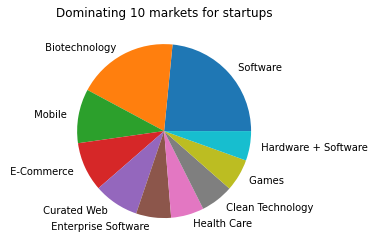

In [14]:
count = df['market'].value_counts()
plt.pie(count.values[:10],labels=count.index[:10])
plt.title('Dominating 10 markets for startups')
plt.show()

Current status of the startups in the datset

In [15]:
df['status'].value_counts()

operating    41829
acquired      3692
closed        2602
Name: status, dtype: int64

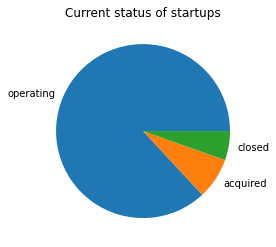

In [16]:
count = df['status'].value_counts()
plt.pie(count.values,labels=count.index)
plt.title('Current status of startups')
plt.show()

Founding country analysis of startups

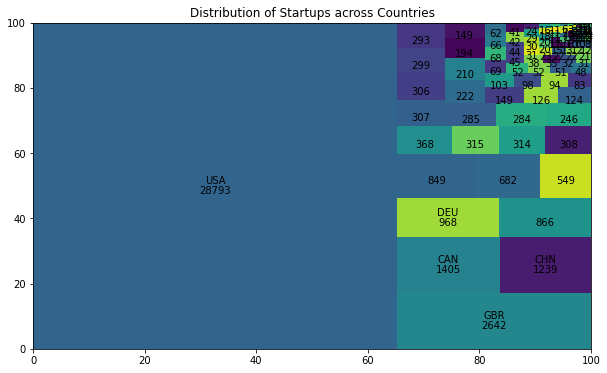

In [17]:
plt.figure(figsize=(10,6))
count = df['country_code'].value_counts()
squarify.plot(sizes=count.values,label=count.index[:5], value=count.values)
plt.title('Distribution of Startups across Countries')
plt.show()

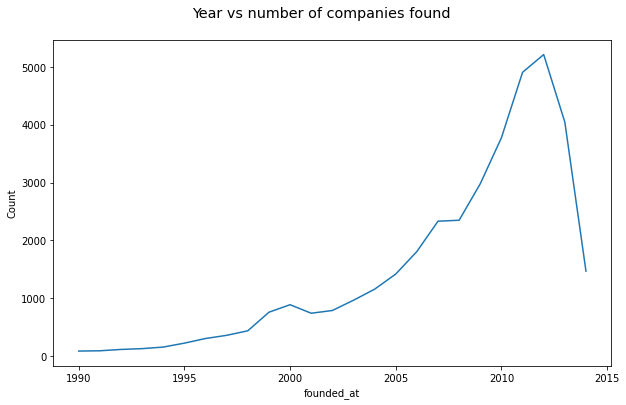

In [18]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors = 'coerce' )
plt.rcParams['figure.figsize'] = 10,6
df['name'][df["founded_at"].dt.year >= 1990].groupby(df["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.title("Year vs number of companies found", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

How does funding change with time

## Getting results from dataset ##

Plotting average amount of fund received during each funding round

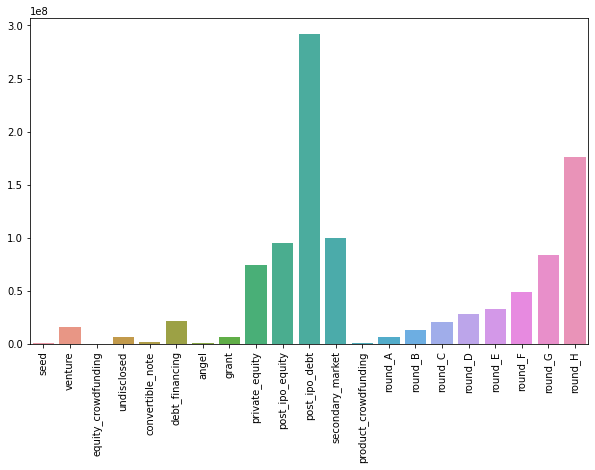

In [19]:
x = []
y = []
for column in df.columns:
  if df[column].dtype == 'float64' and (column!='funding_rounds'and column!='founded_year' and column!='funding_total_usd'):
    x.append(column)
    a = df[df[column]!=0]
    y.append(a[column].mean())
g=sns.barplot(x=x,y=y)
g.set_xticklabels(rotation=90,labels=x)
plt.show()

Plotting the total fund received

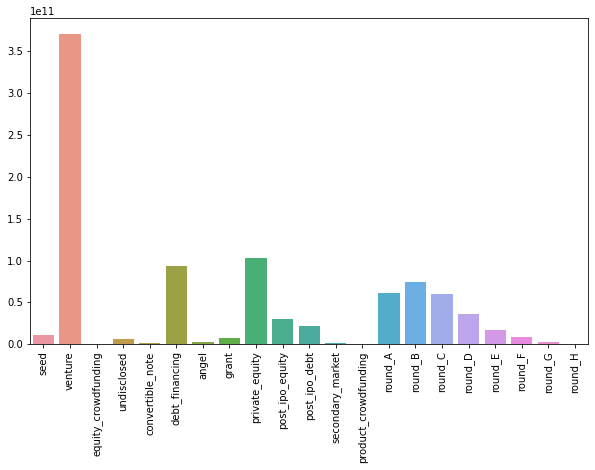

In [20]:
x = []
y = []
for column in df.columns:
  if df[column].dtype == 'float64' and (column!='funding_rounds'and column!='founded_year' and column!='funding_total_usd'):
    x.append(column)
    a = df[df[column]!=0]
    y.append(a[column].sum())
g=sns.barplot(x=x,y=y)
g.set_xticklabels(rotation=90,labels=x)
plt.show()

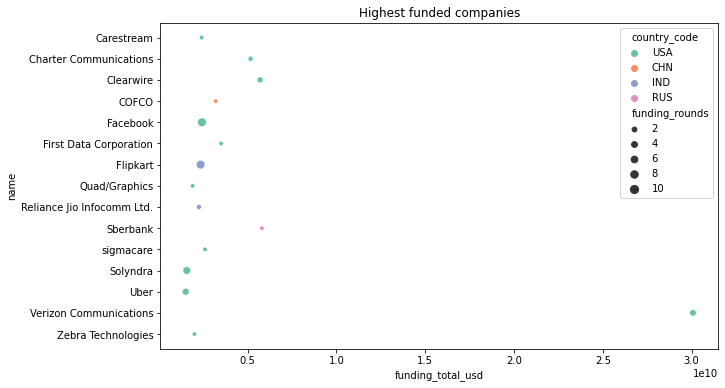

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(y="name",x="funding_total_usd",data=df[df["funding_total_usd"]>1500000000.0],hue="country_code",palette="Set2",size="funding_rounds")
plt.title("Highest funded companies")
plt.show()

we observe that Verizon Communication is an outlier in this analysis. So for further analysis we drop it

How funding varies across secotrs

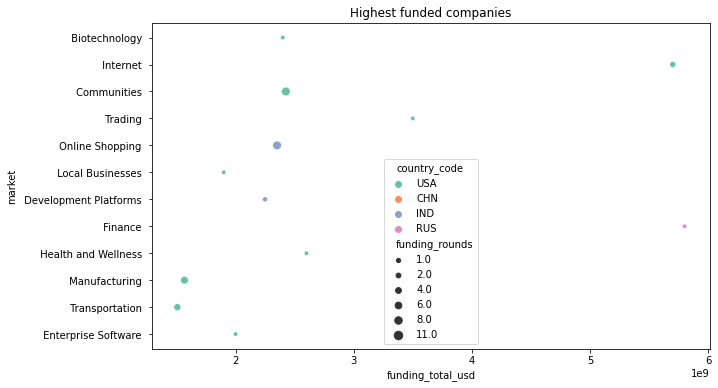

In [22]:
x = df[df["funding_total_usd"]>1500000000.0]
y = x[x["funding_total_usd"]<25000000000.0]
plt.figure(figsize=(10,6))
sns.scatterplot(y="market",x="funding_total_usd",data=y,hue="country_code",palette="Set2",size="funding_rounds")
plt.title("Highest funded companies")
plt.show()


Analysis of startups with funding less than 200 million

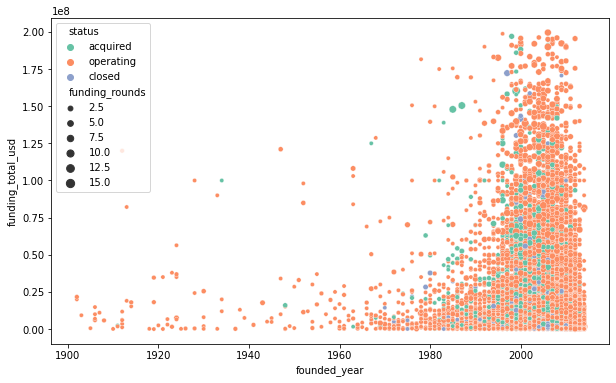

In [23]:
x = df
y = x[x["funding_total_usd"]<200000000.0]
sns.scatterplot(y="funding_total_usd",x="founded_year",data=y,palette="Set2",size="funding_rounds",hue="status")
plt.show()

Analysis of companies with funding over 200 million

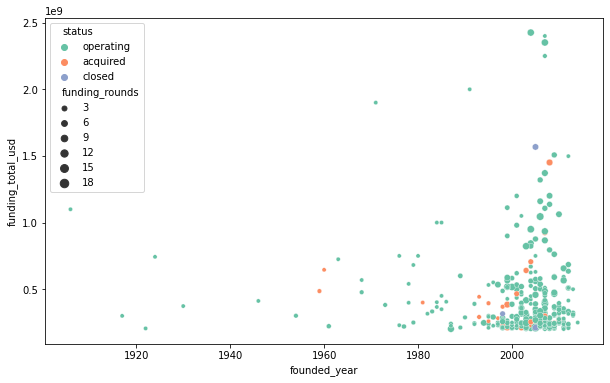

In [24]:
x = df[df["funding_total_usd"]>200000000]
y = x[x["funding_total_usd"]<2500000000.0]
sns.scatterplot(y="funding_total_usd",x="founded_year",data=y,palette="Set2",size="funding_rounds",hue="status")
plt.show()